# Stock Trading

The cell below defines the **abstract class** whose API you need to implement. **Do NOT modify it** - use the dedicated cell further below for your implementation instead.

In [2]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  
      

# abstract class to represent a stock trading platform
class AbstractStockTradingPlatform(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # adds transactionRecord to the set of completed transactions
    @abstractmethod
    def logTransaction(self, transactionRecord):
        pass

    # returns a list with all transactions of a given stockName,
    # sorted by increasing trade value. 
    # stockName : str
    @abstractmethod
    def sortedTransactions(self, stockName): 
        sortedList = []
        return sortedList    
    
    # returns a list of transactions of a given stockName with minimum trade value
    # stockName : str
    @abstractmethod
    def minTransactions(self, stockName): 
        minList = []
        return minList    
    
    # returns a list of transactions of a given stockName with maximum trade value
    # stockName : str
    @abstractmethod
    def maxTransactions(self, stockName): 
        maxList = []
        return maxList    

    # returns a list of transactions of a given stockName, 
    # with the largest trade value below a given thresholdValue.  
    # stockName : str
    # thresholdValue : double
    @abstractmethod
    def floorTransactions(self, stockName, thresholdValue): 
        floorList = []
        return floorList    

    # returns a list of transactions of a given stockName, 
    # with the smallest trade value above a given thresholdValue.  
    # stockName : str
    # thresholdValue : double
    @abstractmethod
    def ceilingTransactions(self, stockName, thresholdValue): 
        ceilingList = []
        return ceilingList    

        
    # returns a list of transactions of a given stockName,  
    # whose trade value is within the range [fromValue, toValue].
    # stockName : str
    # fromValue : double
    # toValue : double
    @abstractmethod
    def rangeTransactions(self, stockName, fromValue, toValue): 
        rangeList = []
        return rangeList    

Use the cell below to define any data structure and auxiliary python function you may need. Leave the implementation of the main API to the next code cell instead.

In [3]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE

# ---------- STOCK TRANSACTION ----------
# - data type: class
# - timestamp: Date string
# - pricePerStock: float
# - quantity: int
# - tradeValue: float
class Transaction:
    def __init__(self, price, quantity, timestamp):
        self.price = price
        self.quantity = quantity
        self.timestamp = timestamp

    def __str__(self):
        return f"({self.price * self.quantity} | {self.timestamp})"


# ---------- STOCK TRANSACTIONS ----------
# - description: to store records for a stock name in sorted order
# - data type: left-leaning red black binary search tree
# - sorted by tradeValue (pricePerStock * quantity)
class Node:
    BLACK = False
    RED = True

    def __init__(self, key, value, color=RED):
        self.key = key
        self.value = [value]
        self.left = None
        self.right = None
        self.color = color

    def update(self, new):
        self.value.append(new)

    def __eq__(self, other):
        return self.key == other.key


class RedBlackBST:
    def __init__(self):
        self.root = None
        self.min = []
        self.max = []
        self.size = 0

    def isRed(self, n):
        return False if n is None else n.color == Node.RED

    def isBlack(self, n):
        return False if n is None else n.color == Node.BLACK

    def insert(self, key, value):
        if self.root is None:
            self.root = Node(key, value, Node.BLACK)
            self.min = [key, [value]]
            self.max = [key, [value]]
            return self.root
        self.checkMin(key, value)
        self.checkMax(key, value)
        
        self.size += 1
        
        return self.insert_helper(self.root, key, value)

    def insert_helper(self, n, key, value):
        if n is None:
            n = Node(key, value)
            return n

        if key == n.key:
            n.update(value)
            return n

        if key < n.key:
            n.left = self.insert_helper(n.left, key, value)
        elif key > n.key:
            n.right = self.insert_helper(n.right, key, value)

        if self.isRed(n.right) and not self.isRed(n.left):
            n = self.rotateLeft(n)
        if self.isRed(n.left) and self.isRed(n.left.left):
            n = self.rotateRight(n)
        if self.isRed(n.left) and self.isRed(n.right):
            n = self.flipColors(n)

        return n

    def get(self, key):
        return self.getHelper(self.root, key)

    def getHelper(self, n, key):
        if n is None:
            print("not found")
            return None
        if key == n.key:
            print("found")
            n.printValues()
            return n.value
        elif key < n.key:
            return self.getHelper(n.left, key)
        elif key > n.key:
            return self.getHelper(n.right, key)

    def rotateLeft(self, n):
        x = n.right

        if n == self.root:
            self.root = x

        n.right = x.left
        x.left = n
        x.color = n.color
        n.color = Node.RED
        return x

    def rotateRight(self, n):
        x = n.left

        if n == self.root:
            self.root = x

        n.left = x.right
        x.right = n
        x.color = n.color
        n.color = Node.RED
        return x

    def flipColors(self, n):
        n.color = Node.RED
        n.left.color = Node.BLACK
        n.right.color = Node.BLACK
        return n
    
    def checkMin(self, key, value):
        if key < self.min[0]:
            self.min = [key, [value]]
        elif key == self.min[0]:
            self.min[1].append(value)

    def checkMax(self, key, value):
        if key > self.max[0]:
            self.max = [key, [value]]
        elif key == self.max[0]:
            self.max[1].append(value)

    def getMin(self):
        return self.min[1]
    
    def getMax(self):
        return self.max[1]

    # def getMin(self):
    #     return self.getMinHelper(self.root)

    # def getMinHelper(self, n):
    #     return n.value if n.left is None else self.getMinHelper(n.left)

    # def getMax(self):
    #     return self.getMaxHelper(self.root)

    # def getMaxHelper(self, n):
    #     return n.value if n.right is None else self.getMaxHelper(n.right)

    def getFloor(self, key):
        result = self.getFloorHelper(self.root, key)
        return [] if result is None else result.value
    
    def getFloorHelper(self, n, key):
        if n is None:
            return None
        if n.key == key:
            return n
        elif n.key > key:
            return self.getFloorHelper(n.left, key)
        elif n.key < key:
            temp = self.getFloorHelper(n.right, key)
            if temp is None or temp.key > key:
                return n
            else:
                return temp

    def getCeiling(self, key):
        result = self.getCeilingHelper(self.root, key)
        return [] if result is None else result.value
      
    def getCeilingHelper(self, n, key):
        if n is None:
            return None
        if n.key == key:
            return n
        elif n.key < key:
            return self.getCeilingHelper(n.right, key)
        elif n.key > key:
            temp = self.getCeilingHelper(n.left, key)
            if temp is None or temp.key < key:
                return n
            else:
                return temp
    
    def getRange(self, key1, key2):
        inRange = []
        self.getRangeHelper(self.root, key1, key2, inRange)
        return inRange
    
    def getRangeHelper(self, n, key1, key2, inRange):
        if n is None:
            return 
        
        if key1 < n.key:
            self.getRangeHelper(n.left, key1, key2, inRange)

        if key1 <= n.key <= key2:
            inRange.extend([value for value in n.value])
        
        self.getRangeHelper(n.right, key1, key2, inRange)

    def sort(self):
        return self.sortHelper(self.root, [])

    def sortHelper(self, n, list):
        if n is None:
            return

        self.sortHelper(n.left, list)
        list.append(n.key)
        self.sortHelper(n.right, list)

        return list


class Transactions:
    def __init__(self):
        self.transactions = RedBlackBST()

    def addTransaction(self, transaction):
        tradeValue = transaction.price * transaction.quantity
        # print("add:", tradeValue)
        self.transactions.insert(tradeValue, transaction)
        # print(self.transactions.sort())

    def sort(self):
        return self.transactions.sort()

    def getMin(self):
        return self.transactions.getMin()

    def getMax(self):
        return self.transactions.getMax()

    def getFloor(self, thresholdValue):
        return self.transactions.getFloor(thresholdValue)

    def getCeiling(self, thresholdValue):
        return self.transactions.getCeiling(thresholdValue)

    def getRange(self, fromValue, toValue):
        return self.transactions.getRange(fromValue, toValue)

    def __str__(self):
        return str(self.transactions)


# ---------- STOCK TABLE ----------
# - description: to look up records by stock name
# - data type: hash table
# - keys: stockName
# - values: records

Use the cell below to implement the requested API. 

In [4]:
# IMPLEMENT HERE THE REQUESTED API

class StockTradingPlatform(AbstractStockTradingPlatform):
    
    def __init__(self):
        self.table = {}

    def logTransaction(self, transactionRecord):
        [stockName, price, quantity, timestamp] = transactionRecord

        if stockName not in self.table:
            self.table[stockName] = Transactions()
        transaction = Transaction(price, quantity, timestamp)
        self.table[stockName].addTransaction(transaction)

    def sortedTransactions(self, stockName): 
        sortedList = []
        if stockName in self.table:
            sortedList = self.table[stockName].sort()
        return sortedList
    
    def minTransactions(self, stockName): 
        minList = []
        if stockName in self.table:
            minList = self.table[stockName].getMin()
        return minList
    
    def maxTransactions(self, stockName): 
        maxList = []
        if stockName in self.table:
            maxList = self.table[stockName].getMax()
        return maxList

    def floorTransactions(self, stockName, thresholdValue): 
        floorList = []
        if stockName in self.table:
            floorList = self.table[stockName].getFloor(thresholdValue)
        return floorList    

    def ceilingTransactions(self, stockName, thresholdValue): 
        ceilingList = []
        if stockName in self.table:
            ceilingList = self.table[stockName].getCeiling(thresholdValue)
        return ceilingList    
    
    def rangeTransactions(self, stockName, fromValue, toValue): 
        rangeList = []
        if stockName in self.table:
            rangeList = self.table[stockName].getRange(fromValue, toValue)
        return rangeList

The cell below provides helper code that you can use within your experimental framework to generate random transaction data. **Do NOT modify it**.

In [9]:
# DO NOT MODIFY THIS CELL

import random
from datetime import timedelta
from datetime import datetime

class TransactionDataGenerator:
    def __init__(self):
        self.stockNames = ["Barclays", "HSBA", "Lloyds Banking Group", "NatWest Group", 
                      "Standard Chartered", "3i", "Abrdn", "Hargreaves Lansdown", 
                      "London Stock Exchange Group", "Pershing Square Holdings", 
                      "Schroders", "St. James's Place plc."]
        self.minTradeValue = 500.00
        self.maxTradeValue = 100000.00
        self.startDate = datetime.strptime('1/1/2022 1:00:00', '%d/%m/%Y %H:%M:%S')
        random.seed(20221603)
          
    # returns the name of a traded stock at random
    def getStockName(self):
        return random.choice(self.stockNames)

    # returns the trade value of a transaction at random
    def getTradeValue(self):
        return round(random.uniform(self.minTradeValue, self.maxTradeValue), 2)
    
    # returns a list of N randomly generated transactions,
    # where each transaction is represented as a list [stock name, price, quantity, timestamp]
    # N : int
    def generateTransactionData(self, N):   
        listTransactions = [[]]*N
        listDates = [self.startDate + timedelta(seconds=3*x) for x in range(0, N)]
        listDatesFormatted = [x.strftime('%d/%m/%Y %H:%M:%S') for x in listDates]
        for i in range(N):
            stockName = random.choice(self.stockNames)
            price = round(random.uniform(50.00, 100.00), 2)
            quantity = random.randint(10,1000)
            listTransactions[i] = [stockName, price, quantity, listDatesFormatted[i]]   
        return listTransactions

Use the cell below for the python code needed to realise your **experimental framework** (i.e., to generate test data, to instante the `StockTrading` class, to thorouhgly experiment with its API functions, and to experimentally measure their performance). You may use the previously provided ``TransactionDataGenerator`` class to generate random transaction data.

In [18]:
import random
import timeit

# ADD YOUR EXPERIMENTAL FRAMEWORK CODE HERE

platform = StockTradingPlatform()
generator = TransactionDataGenerator()

def testLog(data, n, interval, stock_name):
    runs = interval // 10
    starttime = timeit.default_timer()
    
    for i in range(runs):
        transaction = data[n + i]
        transaction[0] = stock_name
        
        platform.logTransaction(transaction)
    
    endtime = timeit.default_timer()
    mean_time = (endtime - starttime) / runs
#     print(f"mean execution time for log: {mean_time}")
    return mean_time

# generate the arguments for the function
def generateArgs(n, stock_name, function_name, data, case):
    if function_name in ['sort', 'min', 'max']:
        return []
    elif function_name in ['floor', 'ceiling']:
        if case == "average":
            random_transaction = data[random.randint(0, n)]
            return [random_transaction[1] * random_transaction[2]]
        elif case == "worst":
            return [generator.getTradeValue()]
    return

# time each function and get a mean execution time
def testFunction(n, stock_name, function_name, function, runs, data, case):
    args = generateArgs(n, stock_name, function_name, data, case)
    
    if function_name == "range":
        # time function
        starttime = timeit.default_timer()
        for _ in range(runs):
            ranges = sorted((generator.getTradeValue(), generator.getTradeValue()))
            function(stock_name, ranges[0], ranges[1])
        endtime = timeit.default_timer()

        mean_time = (endtime - starttime) / runs
        return mean_time
    
    # time function
    starttime = timeit.default_timer()
    for _ in range(runs):
        if len(args) == 0:
            function(stock_name)
        elif len(args) == 1:
            function(stock_name, args[0])
        elif len(args) == 2:
            function(stock_name, args[0], args[1])
    endtime = timeit.default_timer()
    
    mean_time = (endtime - starttime) / runs
    return mean_time

def testAllFunctions(results, n, stock_name, runs, data):
    functions = {
        'sort': platform.sortedTransactions,
        'min': platform.minTransactions,
        'max': platform.maxTransactions,
        'floor': platform.floorTransactions,
        'ceiling': platform.ceilingTransactions,
        'range': platform.rangeTransactions,
    }

    # time each function
    for function_name, function in functions.items():
        average_result = testFunction(n, stock_name, function_name, function, runs, data, "average")
        results[function_name]["average"].append((n, average_result))
        if function_name in ["floor", "ceiling"]:
            worst_result = testFunction(n, stock_name, function_name, function, runs, data, "worst")
            results[function_name]["worst"].append((n, worst_result))

def test(transactions, interval, runs):
    print(f"\n\nStarted testing...")
    print(transactions, "transactions")
    print(interval, "interval")
    print(runs, "runs")
    
    # generate data
    data = generator.generateTransactionData(transactions)
    
    # initialise results dictionary
    results = {
        'log': {"average": []},
        'min': {"average": []},
        'max': {"average": []},
        'sort': {"average": []},
        'floor': {"average": [], "worst": []},
        'ceiling': {"average": [], "worst": []},
        'range': {"average": []}
    }
    
    # get the first stock name
    stock_name = generator.stockNames[0]

    n = 0
    log_time = 0
    
    # go through each transaction
    while n < transactions:
        transaction = data[n]
        transaction[0] = stock_name # set all transactions to have same stock name

        n += 1
        
        if n % interval == interval - interval // 10:
            # test log function
            log_time = testLog(data, n, interval, stock_name)
            
            n += interval // 10
            results["log"]["average"].append((n, log_time))
            
            # test all functions at regular intervals
            print(f"transactions: {n} / {transactions}")
#             print(f"tree size: {platform.table[stock_name].transactions.size}")
            
#             print(f"mean execution time for log: {log_time}")
            testAllFunctions(results, n, stock_name, runs, data)
        
        # just log 1 transaction
        else:
            platform.logTransaction(transaction)
    print("Done!")
    return results

results = test(transactions=10000, interval=100, runs=20)



Started testing...
10000 transactions
100 interval
20 runs
transactions: 100 / 10000
transactions: 200 / 10000
transactions: 300 / 10000
transactions: 400 / 10000
transactions: 500 / 10000
transactions: 600 / 10000
transactions: 700 / 10000
transactions: 800 / 10000
transactions: 900 / 10000
transactions: 1000 / 10000
transactions: 1100 / 10000
transactions: 1200 / 10000
transactions: 1300 / 10000
transactions: 1400 / 10000
transactions: 1500 / 10000
transactions: 1600 / 10000
transactions: 1700 / 10000
transactions: 1800 / 10000
transactions: 1900 / 10000
transactions: 2000 / 10000
transactions: 2100 / 10000
transactions: 2200 / 10000
transactions: 2300 / 10000
transactions: 2400 / 10000
transactions: 2500 / 10000
transactions: 2600 / 10000
transactions: 2700 / 10000
transactions: 2800 / 10000
transactions: 2900 / 10000
transactions: 3000 / 10000
transactions: 3100 / 10000
transactions: 3200 / 10000
transactions: 3300 / 10000
transactions: 3400 / 10000
transactions: 3500 / 10000
tra

The cell below exemplifies **debug** code I will invoke on your submission - it does not represent an experimental framework (which should me much more comprehensive). **Do NOT modify it**. 

In [17]:
# DO NOT MODIFY THIS CELL

import timeit

testPlatform = StockTradingPlatform()
testDataGen = TransactionDataGenerator()

numTransactions = 1000000
testData = testDataGen.generateTransactionData(numTransactions)

numRuns = 100

print("Examples of transactions:", testData[0], testData[numTransactions//2], testData[numTransactions-1])

#
# testing the logTransaction() API 
#
starttime = timeit.default_timer()
for i in range(numTransactions):
    testPlatform.logTransaction(testData[i])
endtime = timeit.default_timer()
print("\nExecution time to load", numTransactions, "transactions:", round(endtime-starttime,4))

#
# testing the various API functions
#
starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.sortedTransactions(testDataGen.getStockName())
endtime = timeit.default_timer()
print("\nMean execution time sortedTransactions:", round((endtime-starttime)/numRuns,4))

starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.minTransactions(testDataGen.getStockName())
endtime = timeit.default_timer()
print("\nMean execution time minTransactions:", round((endtime-starttime)/numRuns,4))

starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.maxTransactions(testDataGen.getStockName())
endtime = timeit.default_timer()
print("\nMean execution time maxTransactions:", round((endtime-starttime)/numRuns,4))


starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.floorTransactions(testDataGen.getStockName(), testDataGen.getTradeValue())
endtime = timeit.default_timer()
print("\nMean execution time floorTransactions:", round((endtime-starttime)/numRuns,4))


starttime = timeit.default_timer()
for i in range(numRuns):
    output = testPlatform.ceilingTransactions(testDataGen.getStockName(), testDataGen.getTradeValue())
endtime = timeit.default_timer()
print("\nMean execution time ceilingTransactions:", round((endtime-starttime)/numRuns,4))


starttime = timeit.default_timer()
for i in range(numRuns):
    rangeValues = sorted([testDataGen.getTradeValue(), testDataGen.getTradeValue()])
    output = testPlatform.rangeTransactions(testDataGen.getStockName(), rangeValues[0], rangeValues[1])
endtime = timeit.default_timer()
print("\nMean execution time rangeTransactions:", round((endtime-starttime)/numRuns,4))

Examples of transactions: ['NatWest Group', 51.89, 96, '01/01/2022 01:00:00'] ['Barclays', 59.84, 245, '18/01/2022 09:40:00'] ['Pershing Square Holdings', 84.27, 319, '04/02/2022 18:19:57']

Execution time to load 1000000 transactions: 20.3394

Mean execution time sortedTransactions: 0.0257

Mean execution time minTransactions: 0.0

Mean execution time maxTransactions: 0.0

Mean execution time floorTransactions: 0.0

Mean execution time ceilingTransactions: 0.0

Mean execution time rangeTransactions: 0.0265


## Visualising results

Install graphing libraries for Python.

In [13]:
%pip install matplotlib
%pip install numpy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Save results to json file

In [20]:
import json

# filename = "results/" + input("Enter the filename to save results as: ")
filename = "results/foo.json"

json_data = json.dumps(results)

with open(filename, 'w') as file:
    file.write(json_data)
    
print("Saved data to file")

Saved data to file


Code for plotting graphs on each function

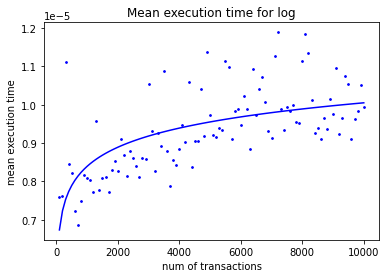

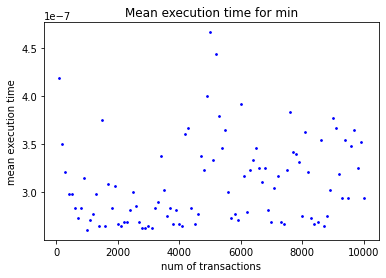

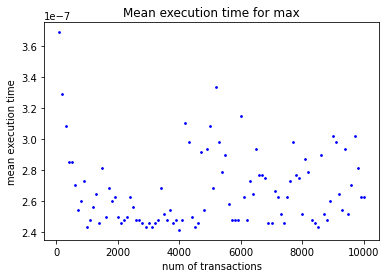

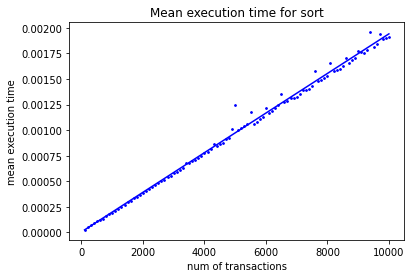

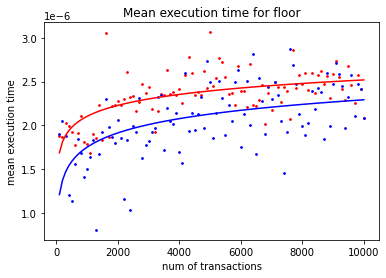

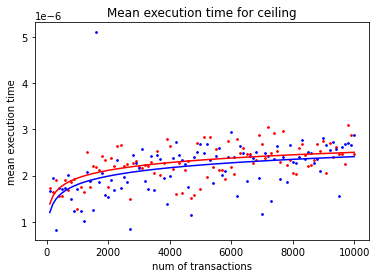

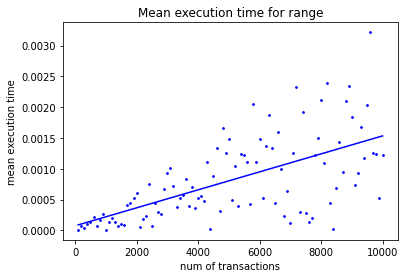

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import json

# function = input("Enter function: ")
filename = "results/foo.json"
# filename = "results/" + input("Enter filename of stored results: ")
with open(filename, 'r') as file:
    results = json.load(file)

def plot_best_fit(plt, function_name, x, y, color):
    best_fit_line = []
    
    # do not draw line of best fit
    if function_name in ['min', 'max']:
        return
    
    # linear line of best fit
    if function_name in ['sort', 'range']:
        m, c = np.polyfit(x, y, 1)
        best_fit_line = m * x + c
    
    # logarithmic line of best fit
    elif function_name in ['log', 'floor', 'ceiling']:
        m, c = np.polyfit(np.log(x), y, 1)
        best_fit_line = m * np.log(x) + c
    
    # plot line of best fit     
    plt.plot(x, best_fit_line, color=color)
    

def plot_graph(function_name, results):
    color_average = "blue"
    color_worst = "red"
    
    x, y_average = zip(*results["average"])
    x = np.array(x)
    y_average = np.array(y_average)
    if "worst" in results:
        x, y_worst = zip(*results["worst"])
        y_worst = np.array(y_worst)
        plt.scatter(x, y_worst, s=3, color=color_worst)
        plot_best_fit(plt, function_name, x, y_worst, color=color_worst)
    
    # plot graph
    plt.scatter(x, y_average, s=3, color=color_average)
    plt.title(f"Mean execution time for {function_name}")
    plt.xlabel('num of transactions')
    plt.ylabel('mean execution time')

    # plot line of best fit
    plot_best_fit(plt, function_name, x, y_average, color=color_average)

    # show graph
    plt.show()

def plot():
    function_names = results.keys()
    cases = results.keys()
    for function_name in function_names:
        plot_graph(function_name, results[function_name])

plot()
